In [2]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk

from  scipy import ndimage

from skimage.io import imread, imshow
from skimage import *
import skimage

###########################
def win_scale(data, wl, ww, dtype, out_range):
    """
    Scale pixel intensity data using specified window level, width, and intensity range.
    """
    
    data_new = np.empty(data.shape, dtype=np.double)
    data_new.fill(out_range[1]-1)
    
    data_new[data <= (wl-ww/2.0)] = out_range[0]
    
    data_new[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))] = ((data[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))]-(wl-0.5))/(ww-1.0)+0.5)*(out_range[1]-out_range[0])+out_range[0]
    
    data_new[data > (wl+ww/2.0)] = out_range[1]-1
    
    return data_new.astype(dtype)

length of contours: 10
[5.0, 23.5, 58.5, 21871.5, 2.0, 4.0, 2.0, 2.0, 2.0, 21934.0] max: 21934.0
area[fsec]: 23.5
area[fsec]: 58.5
area[fsec]: 21871.5
251 190 185 152
64 196 182 149


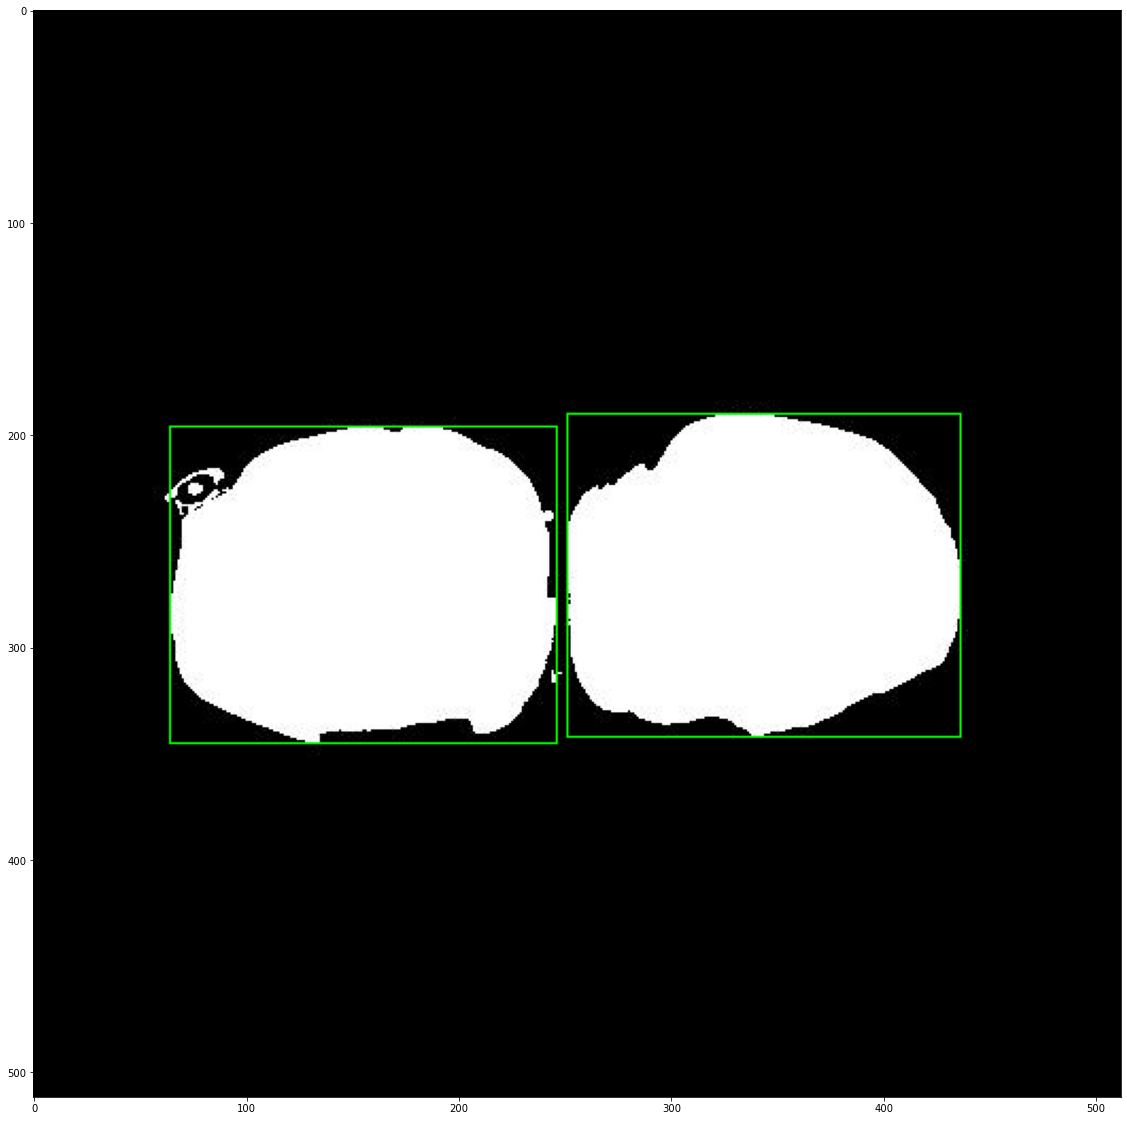

In [6]:
#########cv2 area로 다리2개 좌표 찾기
img = cv2.imread('seg_test.jpg')

gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray1)
img1 = img.copy()

ret, thresh = cv2.threshold(gray1,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print('length of contours:',len(contours))
areas=[]
conloc=[]

legs=[]
for cnt in range(len(contours)):    
    area=cv2.contourArea(contours[cnt])
    areas.append(area)
    conloc.append(contours[cnt])

legs.append(areas.index(max(areas)))
print(areas, 'max:' ,max(areas))            
sec=areas[0]
for fsec in range(1, len(conloc)):
#     print(conloc[fsec])
    if len(conloc)==0 or len(conloc)==1:
        print('check file')
    
    else:
        if areas[fsec]>sec and areas[fsec]< max(areas):
                print('area[fsec]:', areas[fsec])
                sec=areas[fsec]
legs.append(areas.index(sec))
    
    
for tc in range(len(legs)):
    x, y, w, h = cv2.boundingRect(contours[legs[tc]])
    print(x, y, w, h)

    dd=cv2.rectangle(img1,(x,y),(x+w,y+h), (0, 255, 0), 1)

plt.figure(figsize=(20,20))
plt.imshow(img1, cmap='gray')




In [ ]:
gray = hole[0].astype(np.uint8) 
gray += 1
gray[gray==2] = 0

img = hole[0].astype(np.uint8) 

#gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.uint8(img)
# img1 = img.copy()

#ret, thresh = cv2.threshold(gray,127,255,0)

contours, hierachy = cv2.findContours(gray, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for tc in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[tc])


In [47]:
###########################
def win_scale(data, wl, ww, dtype, out_range):
    """
    Scale pixel intensity data using specified window level, width, and intensity range.
    """
    
    data_new = np.empty(data.shape, dtype=np.double)
    data_new.fill(out_range[1]-1)
    
    data_new[data <= (wl-ww/2.0)] = out_range[0]
    
    data_new[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))] = ((data[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))]-(wl-0.5))/(ww-1.0)+0.5)*(out_range[1]-out_range[0])+out_range[0]
    
    data_new[data > (wl+ww/2.0)] = out_range[1]-1
    
    return data_new.astype(dtype)


In [189]:
dcm_list=sorted(glob.glob('../data/dvt/01013843/*.dcm'))
dcm_name=sorted(os.listdir('../data/dvt/01013843'))
img_T1 = sitk.ReadImage(dcm_list)
# print(img_T1)
img_array=sitk.GetArrayFromImage(img_T1)
print(img_array.min(), img_array.max())
img_array = win_scale(img_array, 60, 400, np.uint8, (0, 255))
# imshow(img_array[0])
one_frame=img_array.copy()
# imshow(one_frame[0])
print(img_array.min(), img_array.max())


img_array[img_array > 0] = 255
img_array[img_array <= 0] = 0
        
img_array=ndimage.binary_closing(img_array).astype(np.uint8)
img_array=ndimage.binary_fill_holes(img_array).astype(np.uint8)

img_T1=sitk.GetImageFromArray(img_array)




-1024 3071
0 255


In [157]:
print(one_frame.shape, img_array.shape)

(245, 512, 512) (245, 512, 512)


In [149]:
img_names=[]
for ddd in dcm_name:
    if ddd.endswith('.dcm'):
        img_names.append(ddd[:ddd.rindex('.dcm')])


In [152]:
print(img_names, len(img_names), len(hole))

['01013843_0000', '01013843_0001', '01013843_0002', '01013843_0003', '01013843_0004', '01013843_0005', '01013843_0006', '01013843_0007', '01013843_0008', '01013843_0009', '01013843_0010', '01013843_0011', '01013843_0012', '01013843_0013', '01013843_0014', '01013843_0015', '01013843_0016', '01013843_0017', '01013843_0018', '01013843_0019', '01013843_0020', '01013843_0021', '01013843_0022', '01013843_0023', '01013843_0024', '01013843_0025', '01013843_0026', '01013843_0027', '01013843_0028', '01013843_0029', '01013843_0030', '01013843_0031', '01013843_0032', '01013843_0033', '01013843_0034', '01013843_0035', '01013843_0036', '01013843_0037', '01013843_0038', '01013843_0039', '01013843_0040', '01013843_0041', '01013843_0042', '01013843_0043', '01013843_0044', '01013843_0045', '01013843_0046', '01013843_0047', '01013843_0048', '01013843_0049', '01013843_0050', '01013843_0051', '01013843_0052', '01013843_0053', '01013843_0054', '01013843_0055', '01013843_0056', '01013843_0057', '01013843_005

In [9]:
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

seed = (250,250,68)
seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img_T1)
seg[seed] = 1

In [10]:
seg = sitk.ConfidenceConnected(img_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

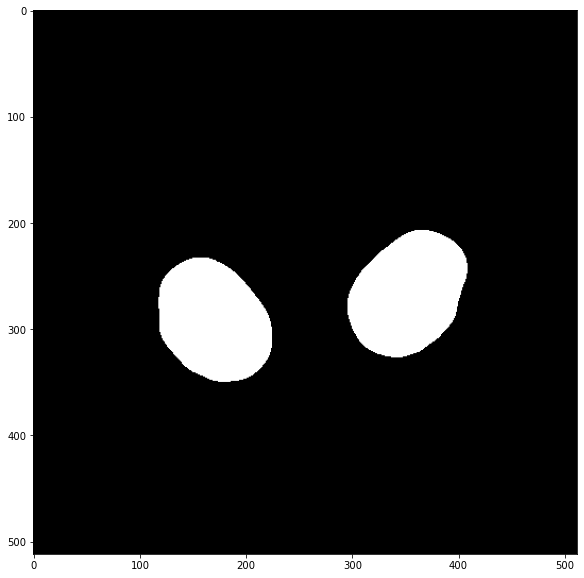

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(hole[125], cmap='gray')

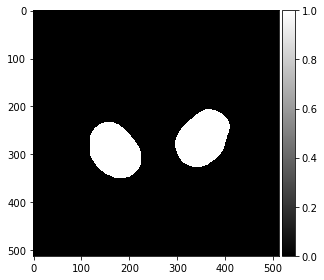

In [29]:
# imgData = sitk.GetArrayFromImage(seg)
# hole=ndimage.binary_closing(imgData).astype(np.uint8)
# hole=ndimage.binary_fill_holes(hole).astype(np.uint8)
hole=sitk.GetArrayFromImage(seg)
imshow(hole[125], cmap='gray')

next
length of contours: 0
no contours 0
next
length of contours: 34
1 266 4 11
61 133 376 230
165 317 3 3
158 316 7 4
154 315 4 4
150 313 5 5
171 311 5 6
147 311 4 4
157 310 4 5
174 307 4 6
198 306 3 3
193 306 6 4
326 305 5 6
180 304 10 10
140 302 8 8
135 302 4 5
338 301 6 5
332 301 5 7
316 301 10 10
127 295 9 10
117 283 12 14
116 277 3 3
114 266 3 4
179 256 50 49
211 291 2 4
196 286 5 5
214 283 1 1
216 274 4 4
107 237 11 31
112 215 3 3
303 165 79 137
358 228 1 1
113 159 108 58
169 171 3 3
one_p번째: 1 번째
[23.0, 67852.0, 2.0, 12.0, 5.5, 9.5, 11.5, 7.0, 7.0, 10.0, 2.0, 9.5, 12.0, 42.0, 26.0, 8.5, 11.5, 13.0, 49.5, 42.5, 52.0, 2.0, 4.0, 1190.5, 0.5, 7.5, 0.0, 6.5, 115.5, 2.0, 5398.5, 0.0, 1604.5, 1.5]
67852.0 66852.0
[23.0, 67852.0, 2.0, 12.0, 5.5, 9.5, 11.5, 7.0, 7.0, 10.0, 2.0, 9.5, 12.0, 42.0, 26.0, 8.5, 11.5, 13.0, 49.5, 42.5, 52.0, 2.0, 4.0, 1190.5, 0.5, 7.5, 0.0, 6.5, 115.5, 2.0, 5398.5, 0.0, 1604.5, 1.5] max: 67852.0
[23.0, 67852.0, 2.0, 12.0, 5.5, 9.5, 11.5, 7.0, 7.0, 10.0, 2.0, 9

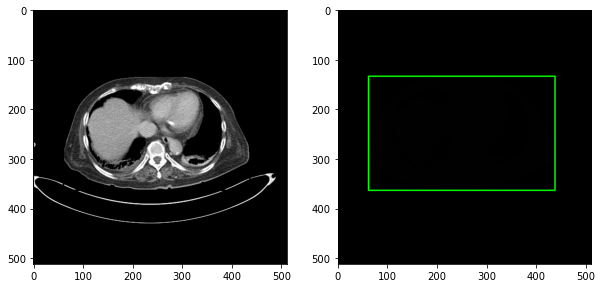

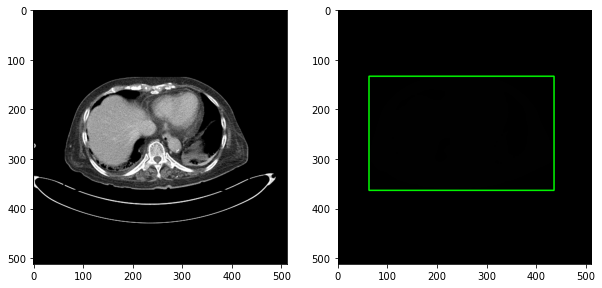

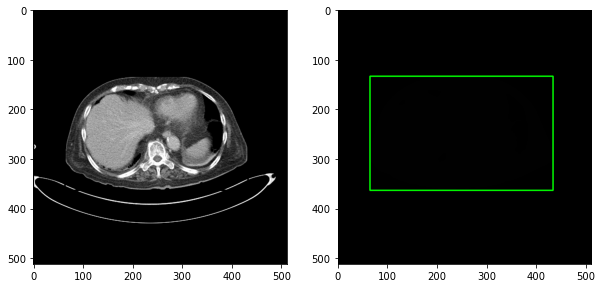

In [13]:
####################test
i=0
# for one_p in range(len(hole)):
# for one_p in range(200,201):
# i=0
for one_p in range(4):
    print('next')
    img = hole[one_p]
    gray = np.uint8(img)
#     gray += 1
#     gray[gray==2] = 0
    img1 = gray.copy()

    
    contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    zero = np.zeros([512,512,3], dtype=np.uint8)

    zero[:,:,0],zero[:,:,1],zero[:,:,2] = gray[:,:], gray[:,:], gray[:,:]

#     zero[:,:,1] = img1
#     zero[:,:,2] = img1

    img2 = zero
    
####################
    print('length of contours:',len(contours))
    areas=[]
    conloc=[]

    legs=[]
    if len(contours)==0:
        print('no contours', one_p)
        i+=1
        io.imsave('../data/try5/test'+'/none/'+ img_names[one_p]+'.png', one_frame[one_p])
        continue
        
    else:
        for cnt in range(len(contours)):    
            area=cv2.contourArea(contours[cnt])
            areas.append(area)
            conloc.append(contours[cnt])
            x, y, w, h = cv2.boundingRect(contours[cnt])
            print(x, y, w, h)
            cv2.rectangle(img1,(x,y),(x+w,y+h), (255, 0, 0),2)
        print('one_p번째:', one_p,'번째')
    print(areas)
    print(max(areas),max(areas)-1000.0)
    legs.append(areas.index(max(areas)))
    print(areas, 'max:' ,max(areas))
    print(areas)
    sec=areas[0]
    
    for fsec in range(0, len(conloc)):
#         print(conloc[fsec])

        if (areas[fsec]!=max(areas)) and (areas[fsec]> max(areas)-1000.0):
            legs.append(areas.index(areas[fsec]))
        
            print('area[fsec]:', areas[fsec])
            sec=areas[fsec]

        else:

            pass
    
    print('legs:',len(legs), legs)
    if len(legs)!=1 and len(legs)!=2:
        print('check!', len(legs))
#         io.imsave('../data/try5/test'+'/'+ img_names[one_p]+str(tc)+'.png', one_frame[one_p])
##################legs 개수로 저장경로 바꾸기
    else:
        for tc in range(len(legs)):
            x, y, w, h = cv2.boundingRect(contours[legs[tc]])
            cv2.rectangle(one_frame[one_p],(x,y),(x+w,y+h), (0, 255, 0), 2)
            cv2.rectangle(img2,(x,y),(x+w,y+h), (0, 255, 0), 2)
            print('x,y,x+w,y+h:',x,y, x+w, y+h)
            crop_img = np.zeros([w,h], dtype=np.uint8)
            crop_img= one_frame[one_p,y:y+h,x:x+w]
            print('one_frame.shape:', one_frame.shape)
            print('crop shape:', crop_img.shape)
            io.imsave('../data/try5/test'+'/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
        print('다음:',one_p+i)

    
    
    

    plt.figure(figsize=(10,10))
# #     print('number:', match_int[oi])
    plt.subplot(1,2,1)
    plt.imshow(one_frame[one_p], cmap='gray')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray')
        

In [7]:
###############one patient test
for one_p in range(len(hole)):

    img = hole[one_p]
    gray = np.uint8(img)

    img1 = gray.copy()

    
    contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
####################

    areas=[]
    conloc=[]

    legs=[]
    if len(contours)==0:
        print('no contours', one_p)
        io.imsave('../data/try5/test'+'/none/'+ img_names[one_p]+'.png', one_frame[one_p])
        continue
        
    else:
        for cnt in range(len(contours)):    
            area=cv2.contourArea(contours[cnt])
            areas.append(area)
            conloc.append(contours[cnt])
            x, y, w, h = cv2.boundingRect(contours[cnt])
            
    legs.append(areas.index(max(areas)))
    sec=areas[0]
    
    for fsec in range(0, len(conloc)):

        if (areas[fsec]!=max(areas)) and (areas[fsec]> max(areas)-1000.0):
            legs.append(areas.index(areas[fsec]))
        
#             print('area[fsec]:', areas[fsec])
            sec=areas[fsec]

        else:

            pass
    
#     print('legs:',len(legs), legs)
    if len(legs)>2:
        print('check!', len(legs))
        io.imsave('../data/try5/test'+'/check/'+ img_names[one_p]+str(tc)+'.png', one_frame[one_p])
##################legs 개수로 저장경로 바꾸기
    elif len(legs)==1:
        for tc in range(len(legs)):
            x, y, w, h = cv2.boundingRect(contours[legs[tc]])
            crop_img = np.zeros([w,h], dtype=np.uint8)
            crop_img= one_frame[one_p,y:y+h,x:x+w]
            io.imsave('../data/try5/test'+'/abdomen/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
    elif len(legs)==2:
        for tc in range(len(legs)):
            x, y, w, h = cv2.boundingRect(contours[legs[tc]])
            crop_img = np.zeros([w,h], dtype=np.uint8)
            crop_img= one_frame[one_p,y:y+h,x:x+w]
            io.imsave('../data/try5/test'+'/legs/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
print('one patient done')
            
            

one patient done


In [95]:
print(img1.shape, img2.shape, img3.shape, zero.shape, img.shape)

(512, 512) (512, 512, 3) (512, 512) (512, 512, 3) (512, 512)


In [ ]:
dcm_list=glob.glob('../data/dvt/01013843/*.dcm')
img_T1 = sitk.ReadImage(dcm_list)
# print(img_T1)
img_array=sitk.GetArrayFromImage(img_T1)
print(img_array.min(), img_array.max())
img_array = win_scale(img_array, 60, 400, np.uint8, (0, 255))

print(img_array.min(), img_array.max())


img_array[img_array > 0] = 255
img_array[img_array <= 0] = 0
        
img_array=ndimage.binary_closing(img_array).astype(np.uint8)
img_array=ndimage.binary_fill_holes(img_array).astype(np.uint8)

img_T1=sitk.GetImageFromArray(img_array)

img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

seed = (250,250,68)
seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img_T1)
seg[seed] = 1

seg = sitk.ConfidenceConnected(img_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

hole=sitk.GetArrayFromImage(seg)

# for one_p in range(len(hole)):
for one_p in range(68,69):
    img = hole[one_p].astype(np.uint8)
    img2= img.copy()
    gray = np.uint8(img)
#     gray += 1
#     gray[gray==2] = 0
    img1 = gray.copy()

    
    contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    zero = np.zeros([512,512,3], dtype=np.uint8)

    zero[:,:,0] = img1
    zero[:,:,1] = img1
    zero[:,:,2] = img1

    img1 = zero

#     print('length of contours:',len(contours))
    areas=[]
    conloc=[]

    legs=[]
    
    for cnt in range(len(contours)):    
        area=cv2.contourArea(contours[cnt])
        areas.append(area)
        conloc.append(contours[cnt])
        
        x, y, w, h = cv2.boundingRect(contours[cnt])
#         print(x, y, w, h)
        cv2.rectangle(img2,(x,y),(x+w,y+h), (0, 255, 0),2)        

    legs.append(areas.index(max(areas)))
#     print(areas, 'max:' ,max(areas))            
    sec=areas[0]
    for fsec in range(1, len(conloc)):
    #     print(conloc[fsec])
        if len(conloc)==0 or len(conloc)==1:
            print('check file')

        else:
            if areas[fsec]>sec and areas[fsec]< max(areas):
                    print('area[fsec]:', areas[fsec])
                    sec=areas[fsec]
    legs.append(areas.index(sec))
    


    for tc in range(len(legs)):
        x, y, w, h = cv2.boundingRect(contours[legs[tc]])
#         print(x, y, w, h)
        dd=cv2.rectangle(img1,(x,y),(x+w,y+h), (0, 255, 0), 2)
        
    plt.figure(figsize=(10,10))
# #     print('number:', match_int[oi])
    plt.subplot(1,2,1)
    plt.imshow(img2, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.imshow(img1, cmap='gray')


In [18]:
img_path='C:/Users/ST-USER/jaewon/DVT_detection/data/try2/crop'
img_name=sorted(os.listdir(img_path))
for image in range(len(img_name)):
    img_list=sorted(glob.glob(img_path+'/'+ img_name[image]+'/'+'*.png'))

roi_path='C:/Users/ST-USER/jaewon/DVT_detection/data/dcm'
p_list= sorted(os.listdir(roi_path))
print('p_list:', p_list[0], len(p_list))
print(img_name[0], len(img_name))
print(img_list[0], len(img_list))

p_list: 01013843 200
01013843 200
C:/Users/ST-USER/jaewon/DVT_detection/data/try2/crop/41030879\41030879_0000.png 245


In [20]:
whole_path='../data/dvt'
whole_list=sorted(glob.glob(whole_path+'/*'))
whole_name=sorted(os.listdir(whole_path))
save_path='../data/try5/'

print(whole_list[0], whole_name[0])

../data/dvt\01013843 01013843


In [26]:
for trw in range(1):
    roizipath=sorted(glob.glob(whole_list[trw] +'/'+'*.zip'))
print(roizipath)

['../data/dvt\\01013843\\01013843.zip']


In [16]:
###########all_save cropped image
whole_path='../data/dvt'
whole_list=sorted(glob.glob(whole_path+'/*'))
whole_name=sorted(os.listdir(whole_path))
save_path='../data/try5/'

# for wl in range(len(whole_list)):
for wl in range(1):
    
    dcm_list=sorted(glob.glob(whole_list[wl]+'/*.dcm'))
    dcm_name=sorted(os.listdir(whole_list[wl]))
        
    img_names=[]
    for ddd in dcm_name:
        if ddd.endswith('.dcm'):
            img_names.append(ddd[:ddd.rindex('.dcm')])
   
    os.mkdir(save_path + whole_name[wl])
    
    one_path=str(save_path + whole_name[wl])

    
    img_T1 = sitk.ReadImage(dcm_list)

    img_array=sitk.GetArrayFromImage(img_T1)
    img_array = win_scale(img_array, 40, 400, np.uint8, (0, 255))

    one_frame=img_array.copy()

    img_array[img_array > 0] = 255
    img_array[img_array <= 0] = 0

    img_array=ndimage.binary_closing(img_array).astype(np.uint8)
    img_array=ndimage.binary_fill_holes(img_array).astype(np.uint8)

    img_T1=sitk.GetImageFromArray(img_array)
    
    img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

    seed = (256,256, 68)
    seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
    seg.CopyInformation(img_T1)
    
    seg[seed] = 1
    
    seg = sitk.ConfidenceConnected(img_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
    
    hole=sitk.GetArrayFromImage(seg)
    
    os.mkdir(one_path+'/none')
    os.mkdir(one_path+'/abdomen')
    os.mkdir(one_path+'/legs')
    os.mkdir(one_path+'/check')
    
    
    for one_p in range(len(hole)):
#     for one_p in range(0):

        img = hole[one_p]
        gray = np.uint8(img)
        img1 = gray.copy()

        contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        areas=[]
        conloc=[]
        legs=[]
        
        if len(contours)==0:
            print('no contours', one_p)
            io.imsave(one_path+'/none/'+ img_names[one_p]+'.png', one_frame[one_p])
            continue

        else:
            for cnt in range(len(contours)):    
                area=cv2.contourArea(contours[cnt])
                areas.append(area)
                conloc.append(contours[cnt])
                x, y, w, h = cv2.boundingRect(contours[cnt])

        legs.append(areas.index(max(areas)))


        for fsec in range(len(conloc)):

            if (areas[fsec]!=max(areas)) and (areas[fsec]> max(areas)-1000.0):
                legs.append(areas.index(areas[fsec]))
                sec=areas[fsec]

            else:

                pass

        if len(legs)>2:
            print('check!', len(legs))
            io.imsave(one_path+'/check/'+ img_names[one_p]+str(tc)+'.png', one_frame[one_p])

        elif len(legs)==1:
            for tc in range(len(legs)):
                x, y, w, h = cv2.boundingRect(contours[legs[tc]])
                crop_img = np.zeros([w,h], dtype=np.uint8)
                crop_img= one_frame[one_p,y:y+h,x:x+w]
                io.imsave(one_path+'/abdomen/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
        elif len(legs)==2:
            for tc in range(len(legs)):
                x, y, w, h = cv2.boundingRect(contours[legs[tc]])
                crop_img = np.zeros([w,h], dtype=np.uint8)
                crop_img= one_frame[one_p,y:y+h,x:x+w]
                io.imsave(one_path+'/legs/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
                
    print('one patient done',whole_list[wl])
   



no contours 0
check! 3
no contours 239
no contours 240
no contours 241
no contours 242
no contours 243
no contours 244
one patient done ../data/dvt\01013843


In [ ]:
########## path to txt and save cropped image (exist lesion) 
whole_path='../data/dvt'
whole_list=sorted(glob.glob(whole_path+'/*'))
whole_name=sorted(os.listdir(whole_path))
save_path='../data/try5/'

# for wl in range(len(whole_list)):
for wl in range(1):
    
    dcm_list=sorted(glob.glob(whole_list[wl]+'/*.dcm'))
    dcm_name=sorted(os.listdir(whole_list[wl]))
        
    img_names=[]
    for ddd in dcm_name:
        if ddd.endswith('.dcm'):
            img_names.append(ddd[:ddd.rindex('.dcm')])
   
    os.mkdir(save_path + whole_name[wl])
    
    one_path=str(save_path + whole_name[wl])

    
    img_T1 = sitk.ReadImage(dcm_list)

    img_array=sitk.GetArrayFromImage(img_T1)
    img_array = win_scale(img_array, 40, 400, np.uint8, (0, 255))

    one_frame=img_array.copy()

    img_array[img_array > 0] = 255
    img_array[img_array <= 0] = 0

    img_array=ndimage.binary_closing(img_array).astype(np.uint8)
    img_array=ndimage.binary_fill_holes(img_array).astype(np.uint8)

    img_T1=sitk.GetImageFromArray(img_array)
    
    img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

    seed = (256,256, 68)
    seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
    seg.CopyInformation(img_T1)
    
    seg[seed] = 1
    
    seg = sitk.ConfidenceConnected(img_T1, seedList=[seed],
                                   numberOfIterations=4,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
    
    hole=sitk.GetArrayFromImage(seg)
    
    os.mkdir(one_path+'/none')
    os.mkdir(one_path+'/abdomen')
    os.mkdir(one_path+'/legs')
    os.mkdir(one_path+'/check')
#     for one_p in range(0):
        

    roizipath=whole_list[trw] +'/'+'*.zip'
    roifile=glob.glob(roizipath)

    roifilename=roifile[0][roifile[0].rindex('\\')+1:roifile[0].rindex('.zip')]

#     print('rfile_path:', roifile,'rfile_name:', roifilename)

    roi_zip = zipfile.ZipFile(roi_path + '/'+p_list[whole] +'/'+ roifilename +'.zip')
    roi_names=roi_zip.namelist()
    roi_zip.close()
    rois = read_roi_zip(roifile[0])###한 환자   

    lesion=[]

    lesion.append(hole.index(뒷번호))

    
    for one_p in range(lesion):

        img = hole[one_p]
        gray = np.uint8(img)
        img1 = gray.copy()

        contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        areas=[]
        conloc=[]
        legs=[]
        
        if len(contours)==0:
            print('no contours', one_p)
            io.imsave(one_path+'/none/'+ img_names[one_p]+'.png', one_frame[one_p])
            continue

        else:
            for cnt in range(len(contours)):    
                area=cv2.contourArea(contours[cnt])
                areas.append(area)
                conloc.append(contours[cnt])
                x, y, w, h = cv2.boundingRect(contours[cnt])

        legs.append(areas.index(max(areas)))


        for fsec in range(len(conloc)):

            if (areas[fsec]!=max(areas)) and (areas[fsec]> max(areas)-1000.0):
                legs.append(areas.index(areas[fsec]))
                sec=areas[fsec]

            else:

                pass

        if len(legs)>2:
            print('check!', len(legs))
            io.imsave(one_path+'/check/'+ img_names[one_p]+str(tc)+'.png', one_frame[one_p])

        elif len(legs)==1:
            for tc in range(len(legs)):
                x, y, w, h = cv2.boundingRect(contours[legs[tc]])
                crop_img = np.zeros([w,h], dtype=np.uint8)
                crop_img= one_frame[one_p,y:y+h,x:x+w]
                io.imsave(one_path+'/abdomen/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
        elif len(legs)==2:
            for tc in range(len(legs)):
                x, y, w, h = cv2.boundingRect(contours[legs[tc]])
                crop_img = np.zeros([w,h], dtype=np.uint8)
                crop_img= one_frame[one_p,y:y+h,x:x+w]
                io.imsave(one_path+'/legs/'+ img_names[one_p]+'_'+str(tc)+'.png', crop_img)
                
    print('one patient done',whole_list[wl])
   

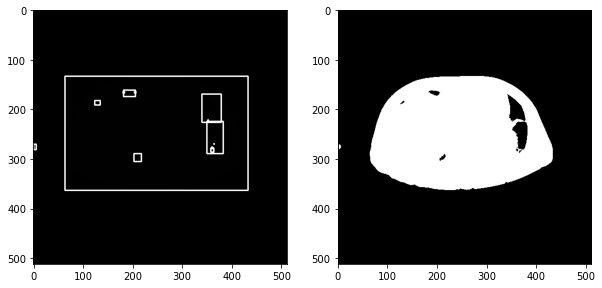

In [15]:
plt.figure(figsize=(10,10))
# #     print('number:', match_int[oi])
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')